In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from pyhive import hive

# Set python variables from environment variables
username = os.environ['USERNAME']
hive_host = os.environ['HIVE_SERVER2'].split(':')[0]
hive_port = os.environ['HIVE_SERVER2'].split(':')[1]

# create connection
conn = hive.connect(
    host=hive_host,
    port=hive_port)

# create cursor
cur = conn.cursor()

print(f"your username is {username}")
print(f"you are connected to {hive_host}:{hive_port}")

your username is lmarchan
you are connected to iccluster044.iccluster.epfl.ch:10000


In [3]:
query = f'CREATE DATABASE IF NOT EXISTS {username}'
cur.execute(query)

In [4]:
query = f"USE {username}"
cur.execute(query)

In [5]:
df = pd.read_sql(f'SELECT * FROM {username}.sbb_orc_istdaten_new LIMIT 200', conn)

In [6]:
df.columns

Index(['sbb_orc_istdaten_new.betriebstag',
       'sbb_orc_istdaten_new.fahrt_bezeichner',
       'sbb_orc_istdaten_new.betreiber_id',
       'sbb_orc_istdaten_new.betreiber_abk',
       'sbb_orc_istdaten_new.betreiber_name',
       'sbb_orc_istdaten_new.produkt_id', 'sbb_orc_istdaten_new.linien_id',
       'sbb_orc_istdaten_new.linien_text', 'sbb_orc_istdaten_new.umlauf_id',
       'sbb_orc_istdaten_new.verkehrsmittel_text',
       'sbb_orc_istdaten_new.zusatzfahrt_tf',
       'sbb_orc_istdaten_new.faellt_aus_tf', 'sbb_orc_istdaten_new.bpuic',
       'sbb_orc_istdaten_new.haltestellen_name',
       'sbb_orc_istdaten_new.ankunftszeit', 'sbb_orc_istdaten_new.an_prognose',
       'sbb_orc_istdaten_new.an_prognose_status',
       'sbb_orc_istdaten_new.abfahrtszeit', 'sbb_orc_istdaten_new.ab_prognose',
       'sbb_orc_istdaten_new.ab_prognose_status',
       'sbb_orc_istdaten_new.durchfahrt_tf', 'sbb_orc_istdaten_new.year',
       'sbb_orc_istdaten_new.month'],
      dtype='object')

In [7]:
df.head()

,sbb_orc_istdaten_new.betriebstag,sbb_orc_istdaten_new.fahrt_bezeichner,sbb_orc_istdaten_new.betreiber_id,sbb_orc_istdaten_new.betreiber_abk,sbb_orc_istdaten_new.betreiber_name,sbb_orc_istdaten_new.produkt_id,sbb_orc_istdaten_new.linien_id,sbb_orc_istdaten_new.linien_text,sbb_orc_istdaten_new.umlauf_id,sbb_orc_istdaten_new.verkehrsmittel_text,...,sbb_orc_istdaten_new.haltestellen_name,sbb_orc_istdaten_new.ankunftszeit,sbb_orc_istdaten_new.an_prognose,sbb_orc_istdaten_new.an_prognose_status,sbb_orc_istdaten_new.abfahrtszeit,sbb_orc_istdaten_new.ab_prognose,sbb_orc_istdaten_new.ab_prognose_status,sbb_orc_istdaten_new.durchfahrt_tf,sbb_orc_istdaten_new.year,sbb_orc_istdaten_new.month
0,28.12.2022,85:882:106378-18101-1,85:882,SBW,Stadtbus Winterthur,Bus,85:882:101,1,1300107,B,...,"Winterthur, Oberwinterthur",,,,28.12.2022 05:54,28.12.2022 05:55:48,REAL,false,2022,12
1,28.12.2022,85:882:106378-18101-1,85:882,SBW,Stadtbus Winterthur,Bus,85:882:101,1,1300107,B,...,"Winterthur, Obstgartenweg",28.12.2022 05:55,28.12.2022 05:56:11,REAL,28.12.2022 05:55,28.12.2022 05:56:11,REAL,false,2022,12
2,28.12.2022,85:882:106378-18101-1,85:882,SBW,Stadtbus Winterthur,Bus,85:882:101,1,1300107,B,...,"Winterthur, Zinzikon",28.12.2022 05:55,28.12.2022 05:56:51,REAL,28.12.2022 05:56,28.12.2022 05:56:59,REAL,false,2022,12
3,28.12.2022,85:882:106378-18101-1,85:882,SBW,Stadtbus Winterthur,Bus,85:882:101,1,1300107,B,...,"Winterthur, Guggenbühl",28.12.2022 05:56,28.12.2022 05:57:39,REAL,28.12.2022 05:56,28.12.2022 05:57:59,REAL,false,2022,12
4,28.12.2022,85:882:106378-18101-1,85:882,SBW,Stadtbus Winterthur,Bus,85:882:101,1,1300107,B,...,"Winterthur, Römertor",28.12.2022 05:57,28.12.2022 05:58:39,REAL,28.12.2022 05:57,28.12.2022 05:58:39,REAL,false,2022,12


In [9]:
%load_ext sparkmagic.magics

Cleaning up livy sessions on exit is enabled


In [10]:
from IPython import get_ipython
username = os.environ['RENKU_USERNAME']
server = "http://iccluster044.iccluster.epfl.ch:8998"

# set the application name as "<your_gaspar_id>-homework3"
get_ipython().run_cell_magic(
    'spark',
    line='config', 
    cell="""{{ "name": "{0}-final-project2", "executorMemory": "4G", "executorCores": 4, "numExecutors": 10, "driverMemory": "4G" }}""".format(username)
)

In [11]:
get_ipython().run_line_magic(
    "spark", f"""add -s {username}-final-project2 -l python -u {server} -k"""
)

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
6138,application_1680948035106_5611,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [13]:
%%spark
df_valid = spark.read.orc(f"/user/epple/hive/sbb_orc_istdaten_new")
df_valid.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

883241383

In [14]:
%%spark
df = df_valid.sample(0.01)  #we work on a sample of 1% of istdaten randomly chosen
df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8837471

In [16]:
%%spark
import pyspark.sql.functions as F
from pyspark.sql import DataFrameStatFunctions
import pandas as pd
from pyspark.sql.functions import col, lower, to_timestamp, date_format, avg, hour

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
%%spark
df_delays = df.select('*', (F.unix_timestamp(F.to_timestamp(df.an_prognose, format ='dd.MM.yyyy HH:mm:ss')) - F.unix_timestamp(F.to_timestamp(df.ankunftszeit,format ='dd.MM.yyyy HH:mm'))).alias('delay'))


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
%%spark
ls = ['fahrt_bezeichner','produkt_id', 'haltestellen_name', 'ankunftszeit', 'an_prognose', 'delay']
df_delays_filter = df_delays.select(ls)
df_delays_filter.show(10) 

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+-----------------+----------------+-------------------+-----+
|fahrt_bezeichner|produkt_id|haltestellen_name|    ankunftszeit|        an_prognose|delay|
+----------------+----------+-----------------+----------------+-------------------+-----+
| 85:11:18220:003|       Zug|      Zürich Enge|11.09.2018 06:06|11.09.2018 06:05:38|  -22|
| 85:11:18220:003|       Zug|        Zürich HB|11.09.2018 06:12|11.09.2018 06:11:14|  -46|
| 85:11:18232:002|       Zug|        Altendorf|11.09.2018 08:32|11.09.2018 08:33:07|   67|
| 85:11:18248:002|       Zug|           Horgen|11.09.2018 12:53|11.09.2018 12:53:08|    8|
| 85:11:18248:002|       Zug|      Zürich Enge|11.09.2018 13:06|11.09.2018 13:05:23|  -37|
| 85:11:18256:002|       Zug|           Horgen|11.09.2018 14:53|11.09.2018 14:53:14|   14|
| 85:11:18257:001|       Zug|      Zürich Enge|11.09.2018 15:22|11.09.2018 15:22:09|    9|
| 85:11:18257:001|       Zug|        Altendorf|11.09.2018 15:54|11.09.2018 15:54:03|    3|

In [19]:
%%spark
df_delays_filter.select('produkt_id').distinct().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+
|   produkt_id|
+-------------+
|          BUS|
|Standseilbahn|
|         Tram|
|          Zug|
|          Bus|
|             |
+-------------+

In [20]:
%%spark
df_delays_filter = df_delays_filter.withColumn("positive_delay", F.when(df_delays.delay > 0, df_delays.delay).otherwise(0))
df_delays_filter.show(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+-----------------+----------------+-------------------+-----+--------------+
|fahrt_bezeichner|produkt_id|haltestellen_name|    ankunftszeit|        an_prognose|delay|positive_delay|
+----------------+----------+-----------------+----------------+-------------------+-----+--------------+
| 85:11:18220:003|       Zug|      Zürich Enge|11.09.2018 06:06|11.09.2018 06:05:38|  -22|             0|
| 85:11:18220:003|       Zug|        Zürich HB|11.09.2018 06:12|11.09.2018 06:11:14|  -46|             0|
| 85:11:18232:002|       Zug|        Altendorf|11.09.2018 08:32|11.09.2018 08:33:07|   67|            67|
| 85:11:18248:002|       Zug|           Horgen|11.09.2018 12:53|11.09.2018 12:53:08|    8|             8|
| 85:11:18248:002|       Zug|      Zürich Enge|11.09.2018 13:06|11.09.2018 13:05:23|  -37|             0|
| 85:11:18256:002|       Zug|           Horgen|11.09.2018 14:53|11.09.2018 14:53:14|   14|            14|
| 85:11:18257:001|       Zug|      Zürich Enge

In [22]:
%%spark
df_delays_filter = df_delays_filter.withColumn('produkt_id', lower(col('produkt_id')));
df_delays_filter.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+-----------------+----------------+-------------------+-----+--------------+
|fahrt_bezeichner|produkt_id|haltestellen_name|    ankunftszeit|        an_prognose|delay|positive_delay|
+----------------+----------+-----------------+----------------+-------------------+-----+--------------+
| 85:11:18220:003|       zug|      Zürich Enge|11.09.2018 06:06|11.09.2018 06:05:38|  -22|             0|
| 85:11:18220:003|       zug|        Zürich HB|11.09.2018 06:12|11.09.2018 06:11:14|  -46|             0|
| 85:11:18232:002|       zug|        Altendorf|11.09.2018 08:32|11.09.2018 08:33:07|   67|            67|
| 85:11:18248:002|       zug|           Horgen|11.09.2018 12:53|11.09.2018 12:53:08|    8|             8|
| 85:11:18248:002|       zug|      Zürich Enge|11.09.2018 13:06|11.09.2018 13:05:23|  -37|             0|
+----------------+----------+-----------------+----------------+-------------------+-----+--------------+
only showing top 5 rows

In [23]:
%%spark
df_delays_filter = df_delays_filter.filter(col("delay").isNotNull())
df_delays_filter.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+-----------------+----------------+-------------------+-----+--------------+
|fahrt_bezeichner|produkt_id|haltestellen_name|    ankunftszeit|        an_prognose|delay|positive_delay|
+----------------+----------+-----------------+----------------+-------------------+-----+--------------+
| 85:11:18220:003|       zug|      Zürich Enge|11.09.2018 06:06|11.09.2018 06:05:38|  -22|             0|
| 85:11:18220:003|       zug|        Zürich HB|11.09.2018 06:12|11.09.2018 06:11:14|  -46|             0|
| 85:11:18232:002|       zug|        Altendorf|11.09.2018 08:32|11.09.2018 08:33:07|   67|            67|
| 85:11:18248:002|       zug|           Horgen|11.09.2018 12:53|11.09.2018 12:53:08|    8|             8|
| 85:11:18248:002|       zug|      Zürich Enge|11.09.2018 13:06|11.09.2018 13:05:23|  -37|             0|
+----------------+----------+-----------------+----------------+-------------------+-----+--------------+
only showing top 5 rows

In [24]:
%%spark
df_delays_filter.select('produkt_id').distinct().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+
|   produkt_id|
+-------------+
|          bus|
|          zug|
|         tram|
|standseilbahn|
|             |
+-------------+

In [25]:
%%spark
df_days_w = df_delays_filter.withColumn("an_prognose",F.to_timestamp(col("an_prognose"), format ='dd.MM.yyyy HH:mm:ss')).withColumn("week_day_abb", date_format(col("an_prognose"), "E"))
df_days_w.show(5)



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+-----------------+----------------+-------------------+-----+--------------+------------+
|fahrt_bezeichner|produkt_id|haltestellen_name|    ankunftszeit|        an_prognose|delay|positive_delay|week_day_abb|
+----------------+----------+-----------------+----------------+-------------------+-----+--------------+------------+
| 85:11:18220:003|       zug|      Zürich Enge|11.09.2018 06:06|2018-09-11 06:05:38|  -22|             0|         Tue|
| 85:11:18220:003|       zug|        Zürich HB|11.09.2018 06:12|2018-09-11 06:11:14|  -46|             0|         Tue|
| 85:11:18232:002|       zug|        Altendorf|11.09.2018 08:32|2018-09-11 08:33:07|   67|            67|         Tue|
| 85:11:18248:002|       zug|           Horgen|11.09.2018 12:53|2018-09-11 12:53:08|    8|             8|         Tue|
| 85:11:18248:002|       zug|      Zürich Enge|11.09.2018 13:06|2018-09-11 13:05:23|  -37|             0|         Tue|
+----------------+----------+-----------------+-

In [26]:
%%spark
days =df_days_w.select('week_day_abb').distinct().rdd.flatMap(lambda x: x).collect()
print(days)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [27]:
%%spark
ttype = df_delays_filter.select('produkt_id').distinct().rdd.flatMap(lambda x: x).collect()
ttype = ttype[:3]
print(ttype)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['bus', 'zug', 'tram']

In [34]:
%%spark
df_days_w =df_days_w.withColumn("hours", hour(col("an_prognose")))
df_days_w.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+----------+-----------------+----------------+-------------------+-----+--------------+------------+-----+
|fahrt_bezeichner|produkt_id|haltestellen_name|    ankunftszeit|        an_prognose|delay|positive_delay|week_day_abb|hours|
+----------------+----------+-----------------+----------------+-------------------+-----+--------------+------------+-----+
| 85:11:18220:003|       zug|      Zürich Enge|11.09.2018 06:06|2018-09-11 06:05:38|  -22|             0|         Tue|    6|
| 85:11:18220:003|       zug|        Zürich HB|11.09.2018 06:12|2018-09-11 06:11:14|  -46|             0|         Tue|    6|
| 85:11:18232:002|       zug|        Altendorf|11.09.2018 08:32|2018-09-11 08:33:07|   67|            67|         Tue|    8|
| 85:11:18248:002|       zug|           Horgen|11.09.2018 12:53|2018-09-11 12:53:08|    8|             8|         Tue|   12|
| 85:11:18248:002|       zug|      Zürich Enge|11.09.2018 13:06|2018-09-11 13:05:23|  -37|             0|         Tue|   13|


In [36]:
%%spark

batch = list(range(0,220,20))
comb = []
for i in range(len(batch)-1):
    tmp = str(batch[i]) + "-" + str(batch[i+1])
    comb.append(tmp)  # create a list with 2 batch together 
    
days = ['Mon', 'Tue', 'Wed', 'Thu','Fri', 'Sat', 'Sun']
ttype = ['bus', 'tram', 'zug']
hours_merge = ['6h-9h', '9h-16h','16-21h']
hours = [6,9,16,21]


combinations = []  #will be a list with all the possible combinations between the days, type of transport and moment in the day 
for week in days:
    for type in ttype:
        for h in hours_merge:
            # Create a combination by concatenating the week name and type
            combination = week + " - " + type + " " + h
            # Add the combination to the list
            combinations.append(combination)  


columns = comb
rows = combinations

df_stat_ist = pd.DataFrame(columns=columns, index=rows)   #create an empty dataframe with all the combinations as rows and the batch as columns
df_stat_ist.head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200']
                  0-20 20-40 40-60 60-80  ... 120-140 140-160 160-180 180-200
Mon - bus 6h-9h    NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Mon - bus 9h-16h   NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Mon - bus 16-21h   NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Mon - tram 6h-9h   NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Mon - tram 9h-16h  NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Mon - tram 16-21h  NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Mon - zug 6h-9h    NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Mon - zug 9h-16h   NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Mon - zug 16-21h   NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN
Tue - bus 6h-9h    NaN   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN

[10 rows x 10 columns]

In [37]:
%%spark
k = 0
for idx,day in enumerate(days):
    for idx2,t in enumerate(ttype):
        w = 0
        for h in range(len(hours)-1):
            for i in range(len(batch)-1):
                number = df_days_w.filter((df_days_w.positive_delay >= batch[i] ) & (df_days_w.positive_delay < batch[i+1]) & (df_days_w.week_day_abb == day) & (df_days_w.produkt_id == t ) & (df_days_w.hours >= hours[h] ) & (df_days_w.hours < hours[h+1]) ).count()
                df_stat_ist.iloc[k+w,i] = number
            w = w + 1
        k = k + 3
df_stat_ist.head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                    0-20  20-40  40-60  60-80  ... 120-140 140-160 160-180 180-200
Mon - bus 6h-9h    37195  26590  33541  27121  ...   12157    8511    5902    4203
Mon - bus 9h-16h   72649  52743  66104  54674  ...   24634   17319   11806    8184
Mon - bus 16-21h   62620  40909  49026  39209  ...   19197   14119   10403    7927
Mon - tram 6h-9h   15055   7783   8316   4889  ...    1623    1110     751     518
Mon - tram 9h-16h  38954  19274  19353  10459  ...    3096    2026    1343     907

[5 rows x 10 columns]

In [40]:
%%spark -o df_istaden_stat -n -1
df_istaden_stat = spark.createDataFrame(df_stat_ist.reset_index())  # transfer into a spark df and save it

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
df_istaden_stat.to_csv("stat_timeday.csv")

<BarContainer object of 10 artists>

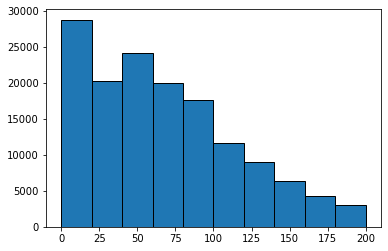

In [51]:
#check if the statistics we computed on istdaten make sense by plotting the distribution on 1 line
frequencies = df_istaden_stat.iloc[0].tolist()[1:]
bin_ranges = list(range(0,220,20))
bin_centers = [(bin_ranges[i] + bin_ranges[i+1]) / 2 for i in range(len(bin_ranges)-1)]
plt.bar(bin_centers, frequencies, width=np.diff(bin_ranges), edgecolor='black')